In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('data/data.csv')

all_data.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

In [136]:
# choose columns that are original

original_features = ['INCOME', 'SAVINGS', 'DEBT', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'T_EDUCATION_12', 'T_EDUCATION_6', 
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'T_FINES_12', 'T_FINES_6', 
       'T_GAMBLING_12', 'T_GAMBLING_6', 'T_GROCERIES_12', 'T_GROCERIES_6', 
       'T_HEALTH_12', 'T_HEALTH_6', 'T_HOUSING_12', 'T_HOUSING_6',
       'T_TAX_12', 'T_TAX_6',
       'T_TRAVEL_12', 'T_TRAVEL_6', 
       'T_UTILITIES_12', 'T_UTILITIES_6', 
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
       'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT']

groups = ['CLOTHING', 'EDUCATION', 'ENTERTAINMENT', 'FINES', 'GAMBLING', 'GROCERIES', 'HEALTH', 'HOUSING', 'TAX', 'TRAVEL', 'UTILITIES']

In [137]:
all_data = all_data[original_features]
all_data['CAT_GAMBLING'] = all_data['CAT_GAMBLING'].map({'No': 0, 'High': 2, 'Low': 1})

In [138]:
data = all_data

In [139]:
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_44833/2731314149.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_EDUCATION_6,T_ENTERTAINMENT_12,T_ENTERTAINMENT_6,T_FINES_12,T_FINES_6,T_GAMBLING_12,T_GAMBLING_6,T_GROCERIES_12,T_GROCERIES_6,T_HEALTH_12,T_HEALTH_6,T_HOUSING_12,T_HOUSING_6,T_TAX_12,T_TAX_6,T_TRAVEL_12,T_TRAVEL_6,T_UTILITIES_12,T_UTILITIES_6,T_EXPENDITURE_12,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.0000,0.6355,0.7679,0.7598,0.6338,0.3401,0.3401,0.7443,0.7049,0.1084,0.0937,0.4310,0.4310,0.7516,0.7485,0.7675,0.6274,0.5704,0.5704,0.9005,0.8961,0.8450,0.7646,0.8975,0.8976,0.9853,0.9575,0.2495,0.2378,0.5192,0.3832,0.0840,0.2107,0.0356,0.0264
SAVINGS,0.6355,1.0000,0.5241,0.3341,0.2871,0.3705,0.3707,0.2296,0.2254,0.0333,0.0238,0.1156,0.1175,0.7752,0.7672,0.6719,0.5548,0.5389,0.5389,0.4796,0.4764,0.4673,0.4295,0.6965,0.6964,0.6705,0.6492,0.1754,0.2157,0.3339,0.3833,0.0895,0.5321,0.0796,-0.0178
DEBT,0.7679,0.5241,1.0000,0.5278,0.4308,0.3782,0.3781,0.4790,0.4621,0.0636,0.1008,0.3077,0.3057,0.7204,0.7089,0.5844,0.4665,0.4814,0.4814,0.6913,0.6859,0.5988,0.5332,0.7590,0.7592,0.7718,0.7406,0.2693,0.1991,0.6596,0.3238,0.0420,0.3701,-0.3367,0.1222
T_CLOTHING_12,0.7598,0.3341,0.5278,1.0000,0.9115,0.1677,0.1677,0.7295,0.6792,0.0991,0.0607,0.3546,0.3588,0.4831,0.5053,0.6261,0.5927,0.3071,0.3071,0.7307,0.7288,0.6502,0.6393,0.6406,0.6408,0.7611,0.7833,0.1519,0.2136,0.3645,0.1811,0.0748,-0.0099,0.0110,0.0340
T_CLOTHING_6,0.6338,0.2871,0.4308,0.9115,1.0000,0.1484,0.1484,0.5401,0.5015,0.0524,0.0148,0.2575,0.2656,0.4064,0.4501,0.6028,0.6433,0.2488,0.2488,0.5540,0.5537,0.5747,0.6288,0.4902,0.4905,0.6409,0.7180,0.1079,0.1612,0.3071,0.1567,0.0564,-0.0007,-0.0165,0.0546
T_EDUCATION_12,0.3401,0.3705,0.3782,0.1677,0.1484,1.0000,1.0000,0.0440,0.0426,0.0591,0.0759,0.0085,0.0107,0.5667,0.5589,0.2588,0.2026,0.2280,0.2280,0.2138,0.2162,0.1621,0.1527,0.4007,0.4008,0.3897,0.3718,0.1011,0.1189,0.2566,0.1688,0.0174,0.5544,-0.0894,-0.0095
T_EDUCATION_6,0.3401,0.3707,0.3781,0.1677,0.1484,1.0000,1.0000,0.0440,0.0426,0.0589,0.0755,0.0085,0.0108,0.5668,0.5590,0.2590,0.2028,0.2280,0.2280,0.2139,0.2163,0.1619,0.1526,0.4008,0.4009,0.3898,0.3718,0.1011,0.1189,0.2565,0.1688,0.0175,0.5546,-0.0892,-0.0096
T_ENTERTAINMENT_12,0.7443,0.2296,0.4790,0.7295,0.5401,0.0440,0.0440,1.0000,0.9828,0.1132,0.0901,0.4775,0.4723,0.3337,0.3226,0.5048,0.3673,0.2597,0.2597,0.8161,0.8139,0.6456,0.5281,0.6411,0.6411,0.7270,0.6808,0.1530,0.1824,0.3620,0.1799,0.0764,-0.2356,0.1124,-0.0211
T_ENTERTAINMENT_6,0.7049,0.2254,0.4621,0.6792,0.5015,0.0426,0.0426,0.9828,1.0000,0.0946,0.0789,0.4351,0.4290,0.3224,0.3128,0.4829,0.3514,0.2419,0.2419,0.7705,0.7688,0.6126,0.5007,0.6076,0.6075,0.6928,0.6543,0.1366,0.1722,0.3536,0.1682,0.0684,-0.2156,0.0858,-0.0149
T_FINES_12,0.1084,0.0333,0.0636,0.0991,0.0524,0.0591,0.0589,0.1132,0.0946,1.0000,0.8235,0.1344,0.1309,0.0645,0.0636,0.0491,0.0121,-0.0322,-0.0322,0.1085,0.0971,0.1058,0.0684,0.0943,0.0944,0.1022,0.0810,0.0641,0.0464,0.0835,-0.0345,0.0099,0.0142,-0.0241,0.0435


<h3>We can drop: T_EDUCATION_6, T_ENTERTAINMENT_6, T_GAMBLING_6, T_GROCERIES_6, T_HOUSING_6, T_TAX_6, T_UTILITIES_6</h3> Correlations are>98%

In [140]:
#drop: T_EDUCATION_6, T_ENTERTAINMENT_6, T_GAMBLING_6, T_GROCERIES_6, T_HOUSING_6, T_TAX_6, T_UTILITIES_6
data.drop(['T_EDUCATION_6', 'T_ENTERTAINMENT_6', 'T_GAMBLING_6', 'T_GROCERIES_6', 'T_HOUSING_6', 'T_TAX_6', 'T_UTILITIES_6'], axis=1, inplace=True)

In [141]:
data.columns

Index(['INCOME', 'SAVINGS', 'DEBT', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'T_FINES_12', 'T_FINES_6',
       'T_GAMBLING_12', 'T_GROCERIES_12', 'T_HEALTH_12', 'T_HEALTH_6',
       'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12', 'T_TRAVEL_6',
       'T_UTILITIES_12', 'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'CAT_GAMBLING',
       'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
       'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT'],
      dtype='object')

In [142]:
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_44833/2731314149.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_FINES_6,T_GAMBLING_12,T_GROCERIES_12,T_HEALTH_12,T_HEALTH_6,T_HOUSING_12,T_TAX_12,T_TRAVEL_12,T_TRAVEL_6,T_UTILITIES_12,T_EXPENDITURE_12,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.0000,0.6355,0.7679,0.7598,0.6338,0.3401,0.7443,0.1084,0.0937,0.4310,0.7516,0.7675,0.6274,0.5704,0.9005,0.8450,0.7646,0.8975,0.9853,0.9575,0.2495,0.2378,0.5192,0.3832,0.0840,0.2107,0.0356,0.0264
SAVINGS,0.6355,1.0000,0.5241,0.3341,0.2871,0.3705,0.2296,0.0333,0.0238,0.1156,0.7752,0.6719,0.5548,0.5389,0.4796,0.4673,0.4295,0.6965,0.6705,0.6492,0.1754,0.2157,0.3339,0.3833,0.0895,0.5321,0.0796,-0.0178
DEBT,0.7679,0.5241,1.0000,0.5278,0.4308,0.3782,0.4790,0.0636,0.1008,0.3077,0.7204,0.5844,0.4665,0.4814,0.6913,0.5988,0.5332,0.7590,0.7718,0.7406,0.2693,0.1991,0.6596,0.3238,0.0420,0.3701,-0.3367,0.1222
T_CLOTHING_12,0.7598,0.3341,0.5278,1.0000,0.9115,0.1677,0.7295,0.0991,0.0607,0.3546,0.4831,0.6261,0.5927,0.3071,0.7307,0.6502,0.6393,0.6406,0.7611,0.7833,0.1519,0.2136,0.3645,0.1811,0.0748,-0.0099,0.0110,0.0340
T_CLOTHING_6,0.6338,0.2871,0.4308,0.9115,1.0000,0.1484,0.5401,0.0524,0.0148,0.2575,0.4064,0.6028,0.6433,0.2488,0.5540,0.5747,0.6288,0.4902,0.6409,0.7180,0.1079,0.1612,0.3071,0.1567,0.0564,-0.0007,-0.0165,0.0546
T_EDUCATION_12,0.3401,0.3705,0.3782,0.1677,0.1484,1.0000,0.0440,0.0591,0.0759,0.0085,0.5667,0.2588,0.2026,0.2280,0.2138,0.1621,0.1527,0.4007,0.3897,0.3718,0.1011,0.1189,0.2566,0.1688,0.0174,0.5544,-0.0894,-0.0095
T_ENTERTAINMENT_12,0.7443,0.2296,0.4790,0.7295,0.5401,0.0440,1.0000,0.1132,0.0901,0.4775,0.3337,0.5048,0.3673,0.2597,0.8161,0.6456,0.5281,0.6411,0.7270,0.6808,0.1530,0.1824,0.3620,0.1799,0.0764,-0.2356,0.1124,-0.0211
T_FINES_12,0.1084,0.0333,0.0636,0.0991,0.0524,0.0591,0.1132,1.0000,0.8235,0.1344,0.0645,0.0491,0.0121,-0.0322,0.1085,0.1058,0.0684,0.0943,0.1022,0.0810,0.0641,0.0464,0.0835,-0.0345,0.0099,0.0142,-0.0241,0.0435
T_FINES_6,0.0937,0.0238,0.1008,0.0607,0.0148,0.0759,0.0901,0.8235,1.0000,0.1376,0.0695,0.0324,-0.0112,-0.0316,0.0910,0.0893,0.0498,0.0876,0.0894,0.0668,0.0815,0.0382,0.1306,-0.0252,0.0027,0.0146,-0.0570,0.0916
T_GAMBLING_12,0.4310,0.1156,0.3077,0.3546,0.2575,0.0085,0.4775,0.1344,0.1376,1.0000,0.1704,0.2540,0.1888,0.1757,0.4274,0.3333,0.2910,0.3290,0.4175,0.3941,0.7426,0.1173,0.2340,0.1391,0.0360,-0.1237,-0.0579,0.0144


/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_44833/182358471.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 7))


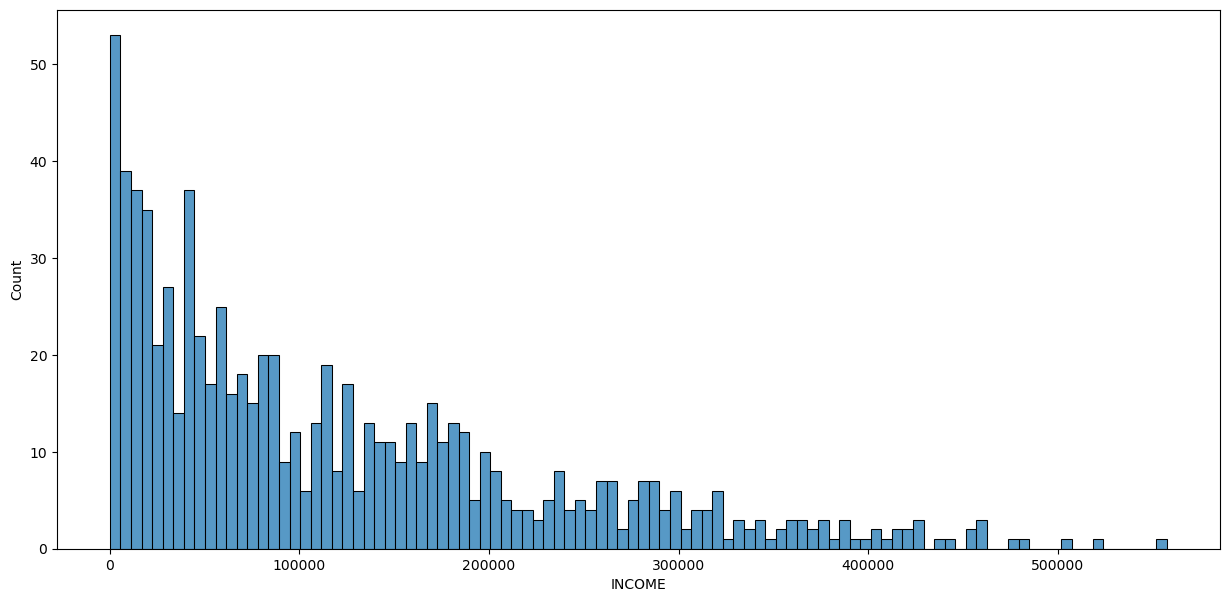

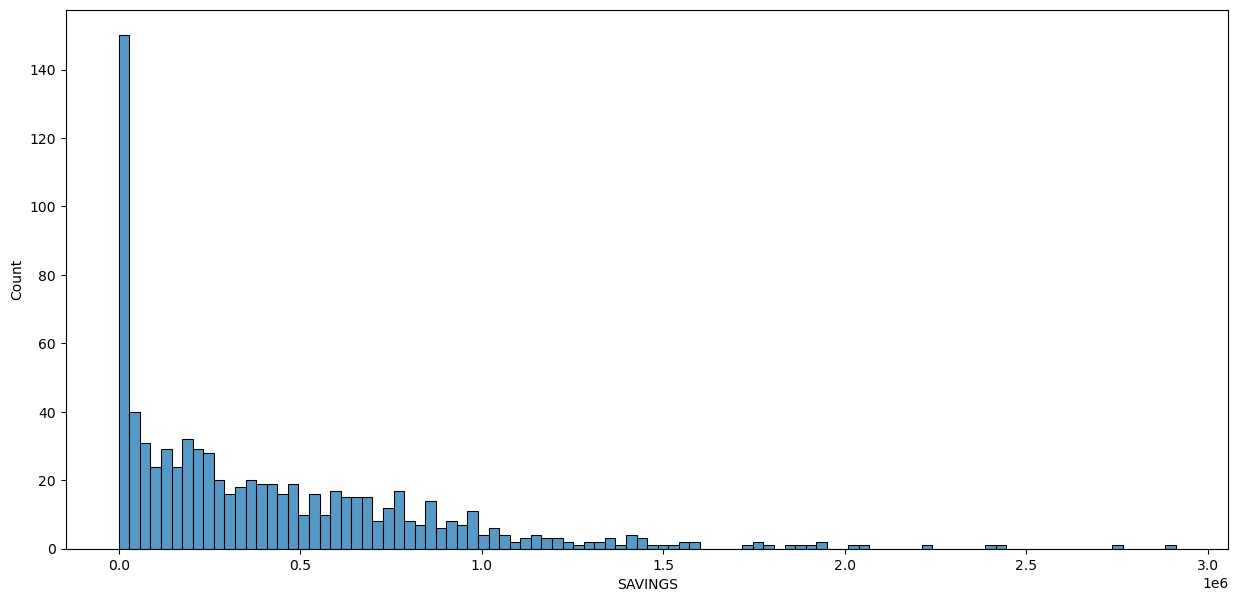

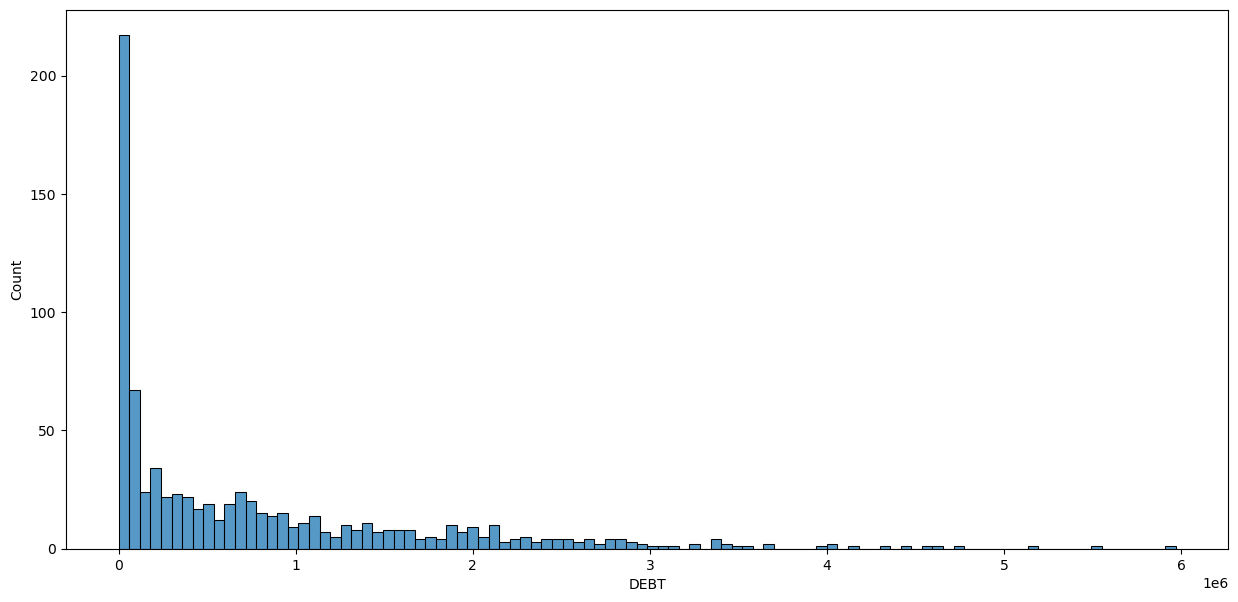

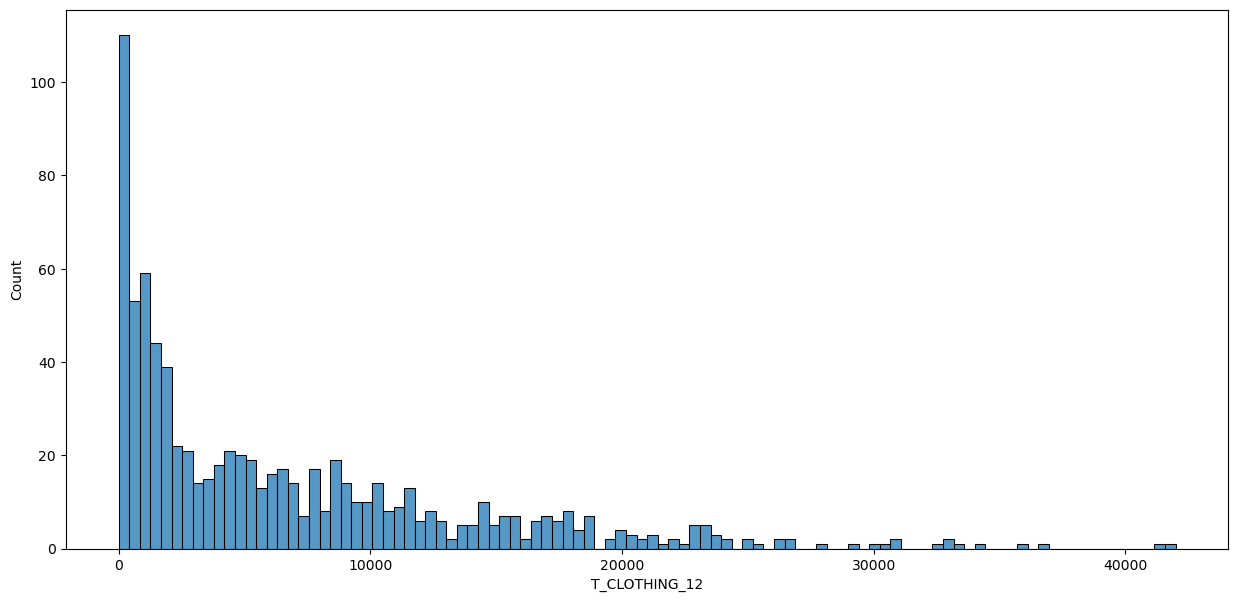

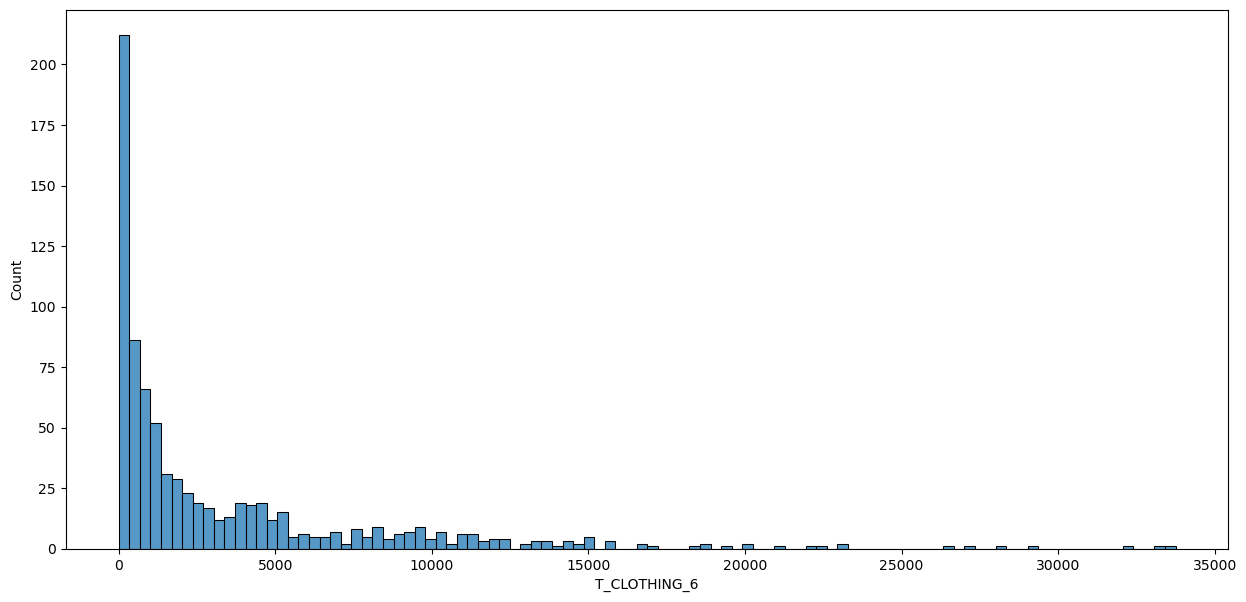

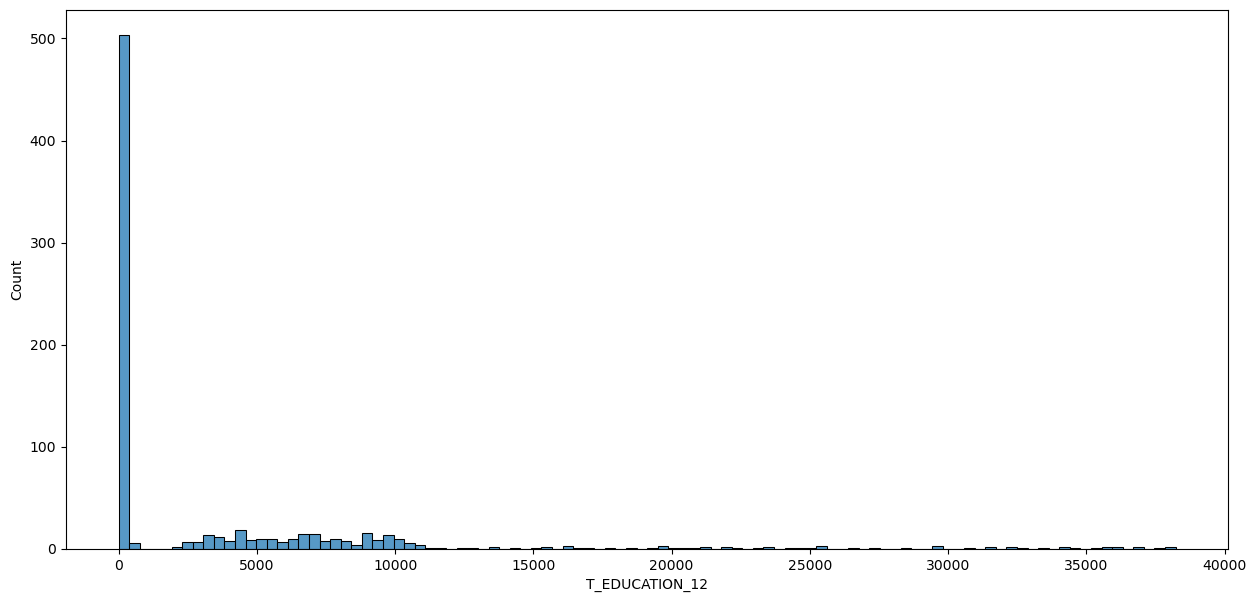

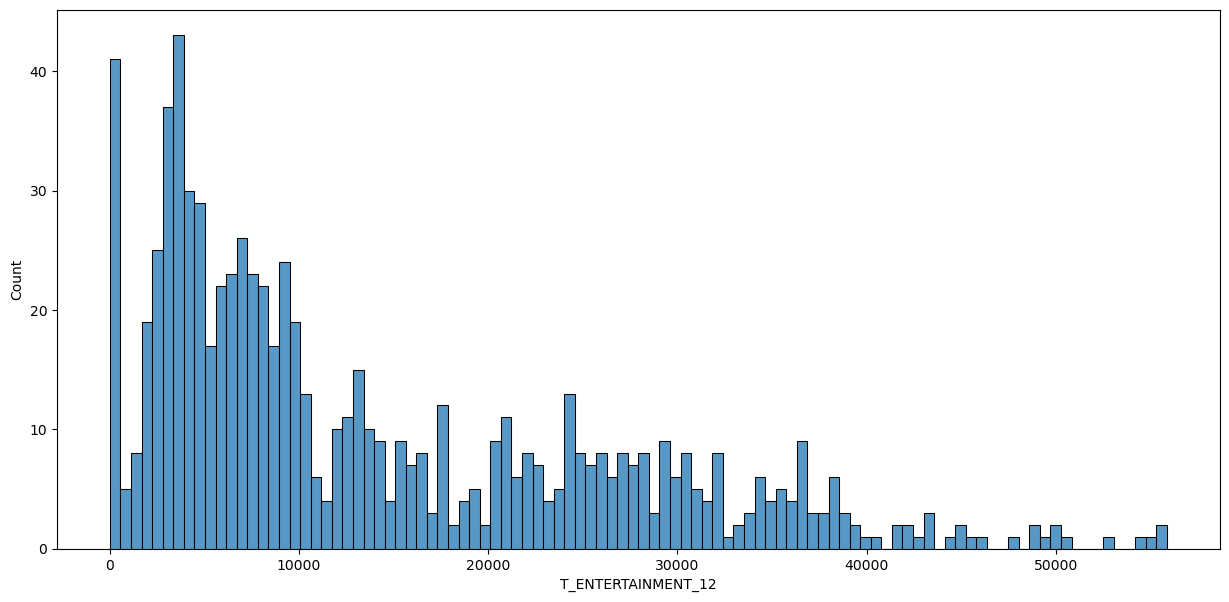

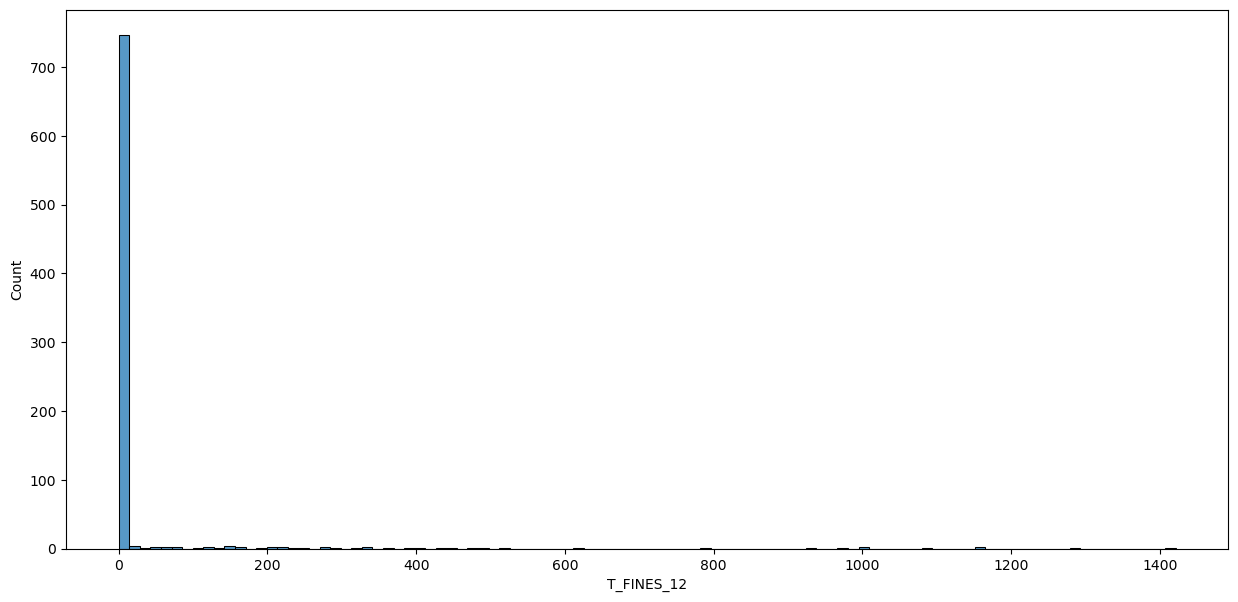

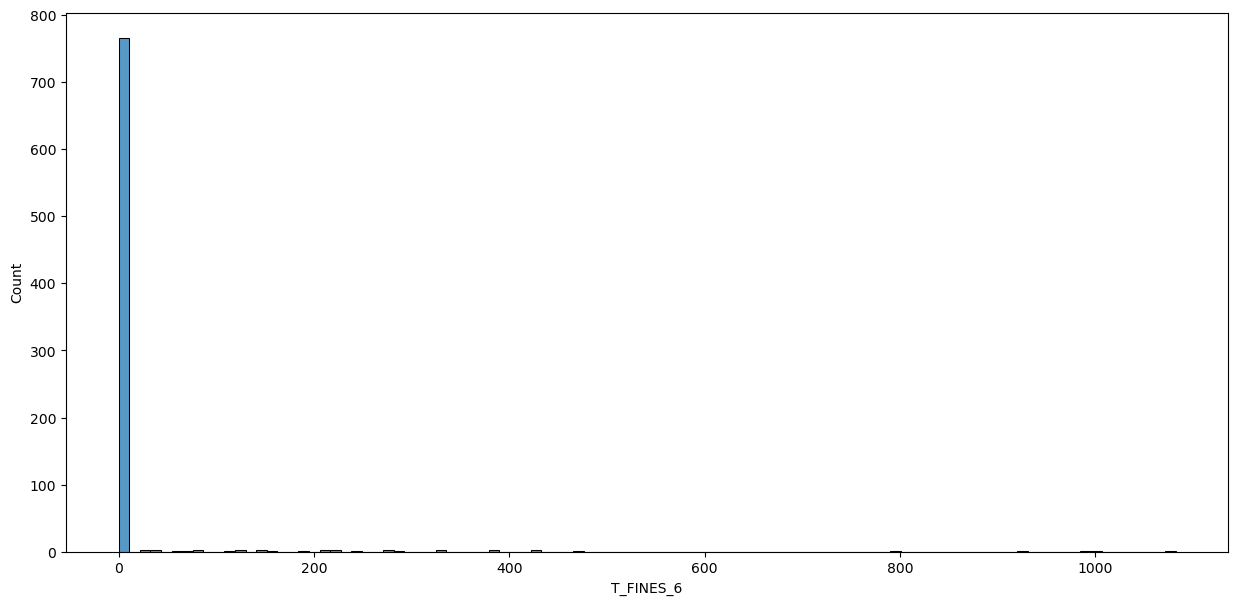

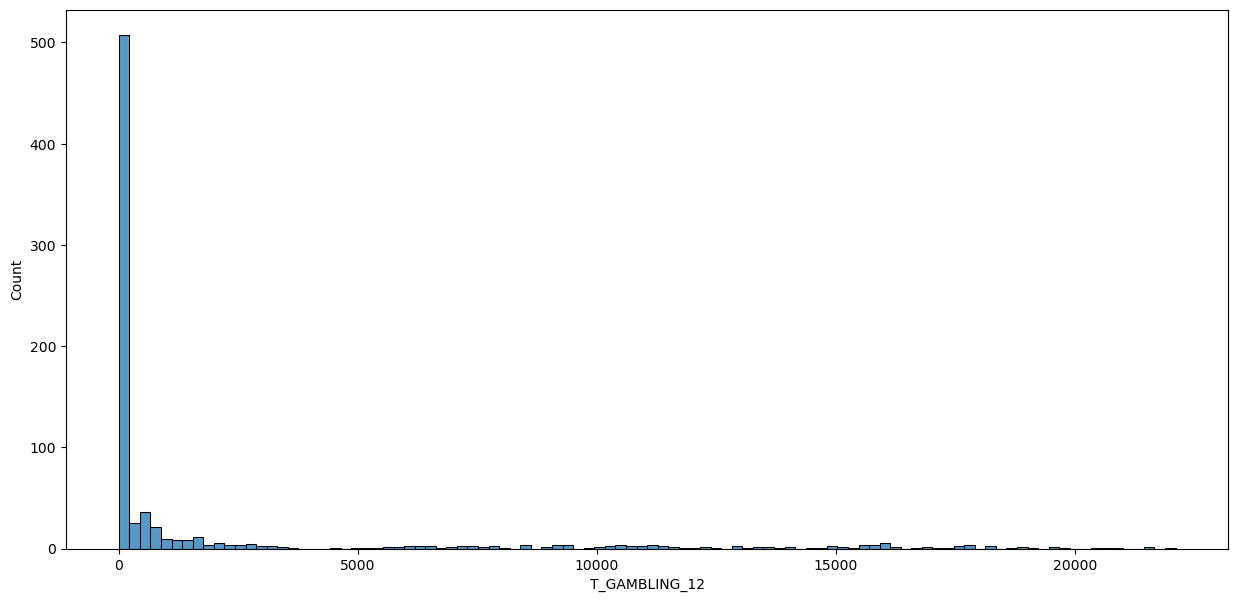

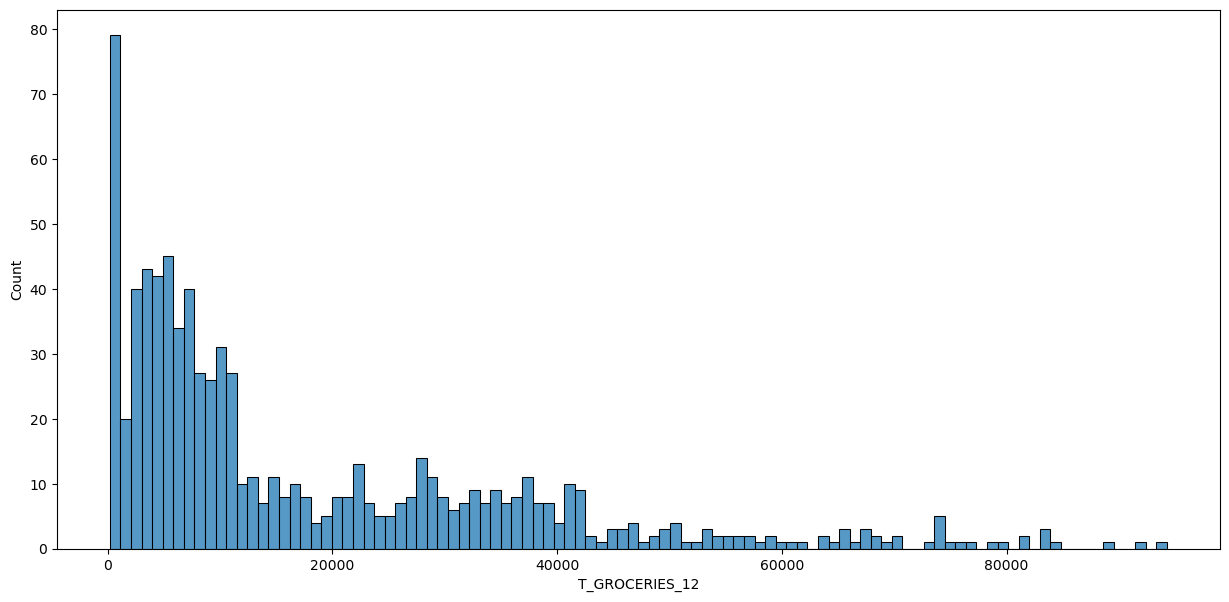

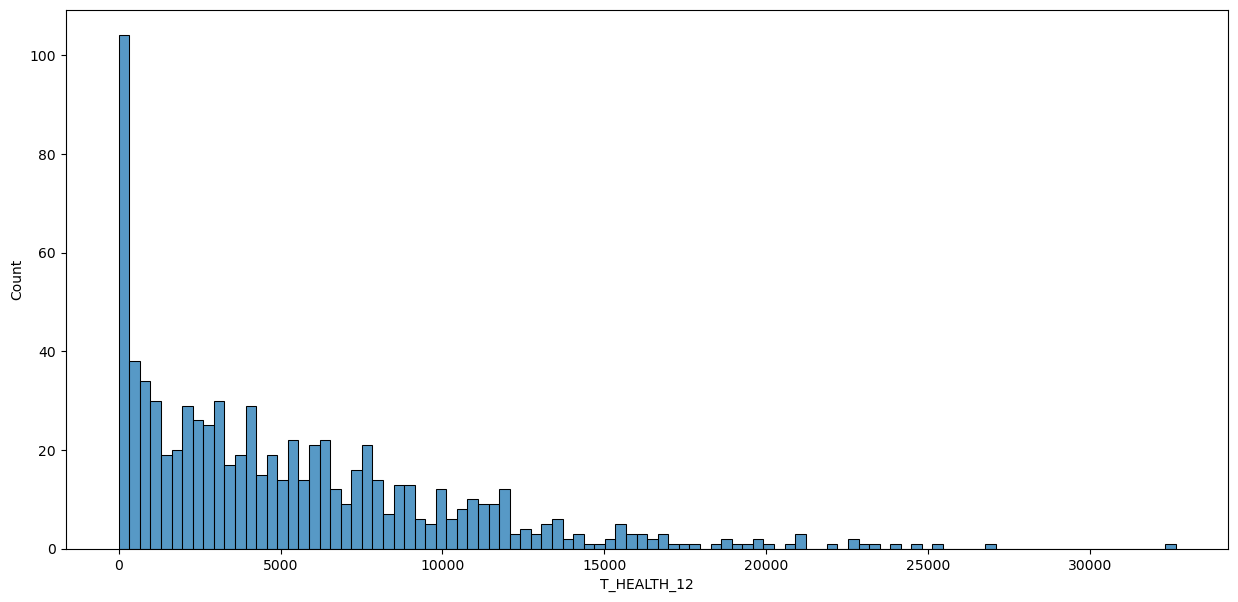

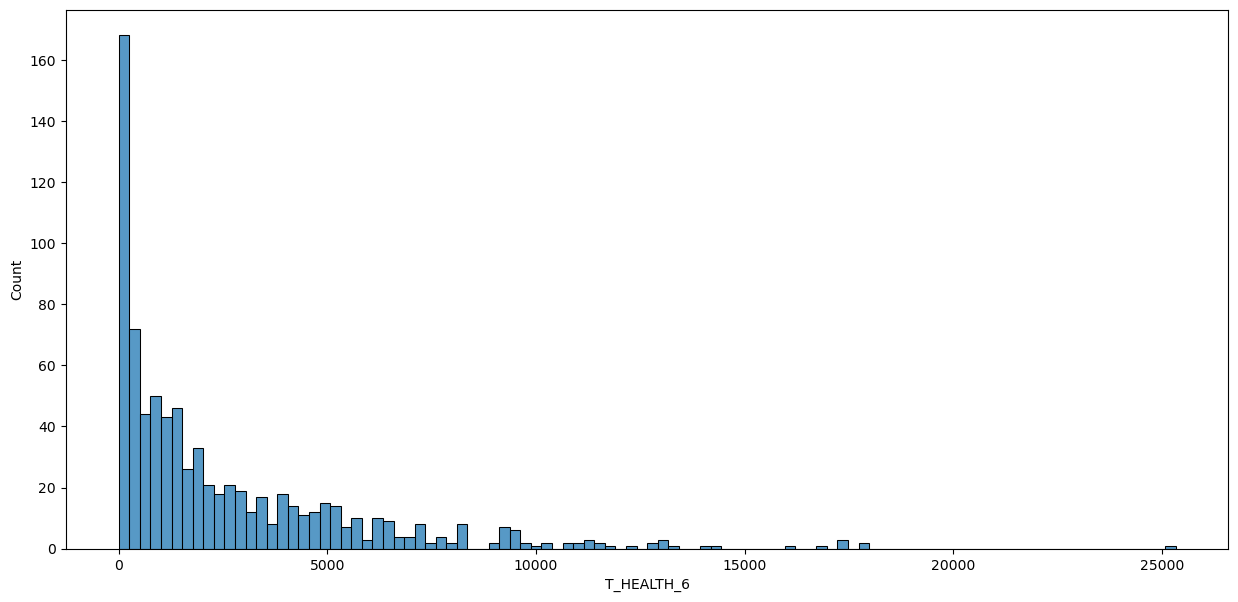

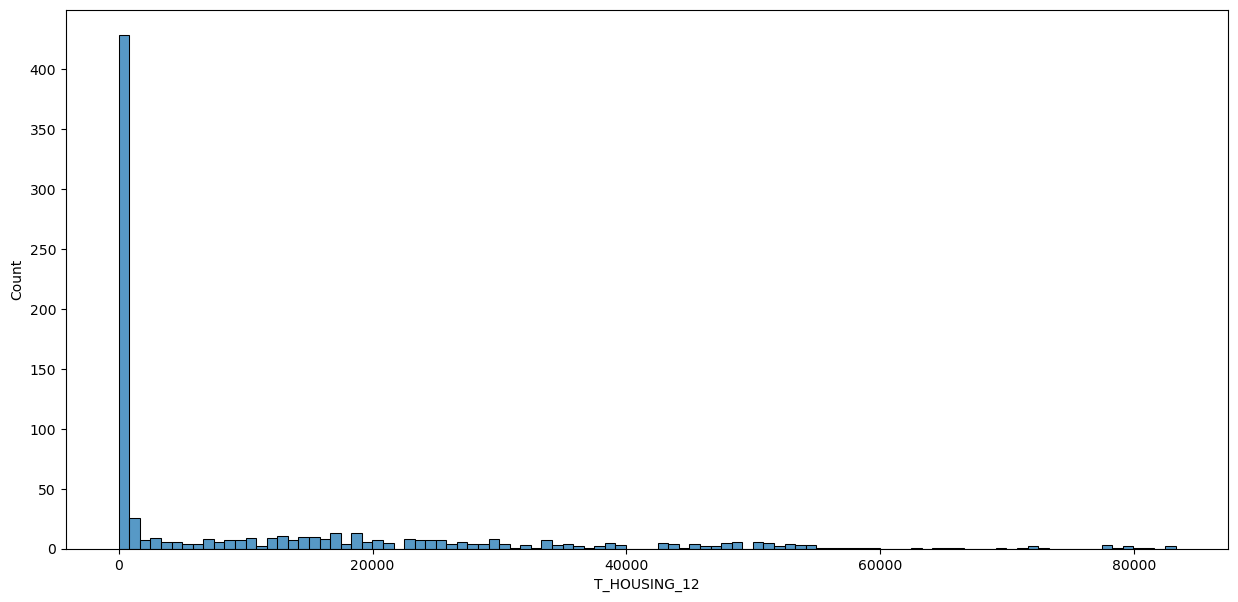

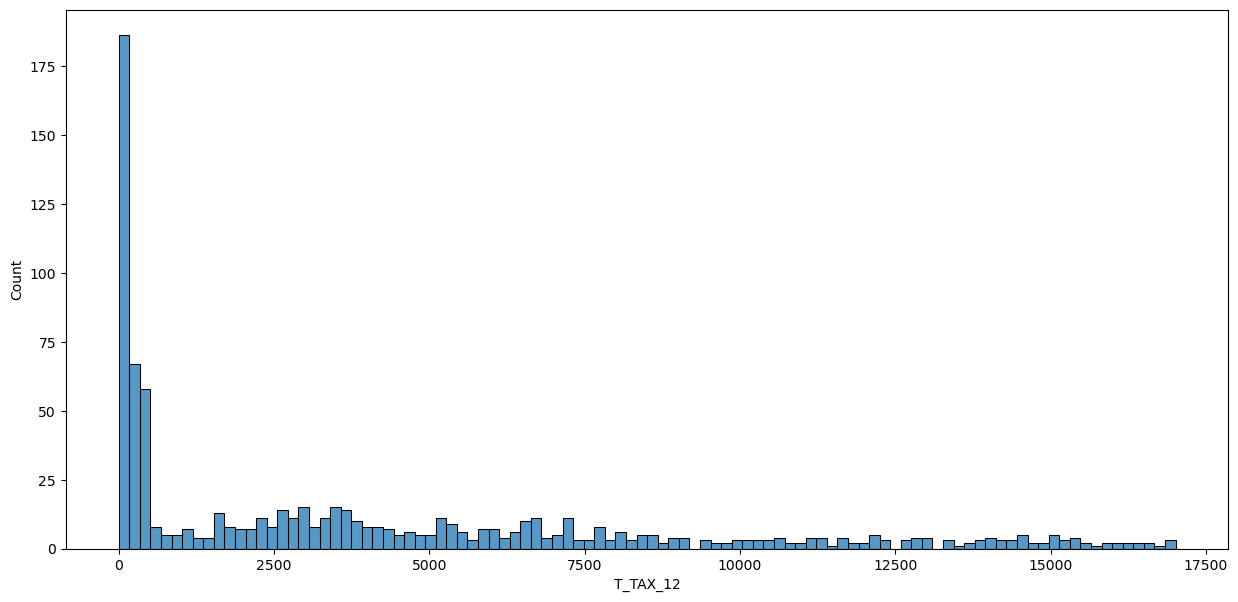

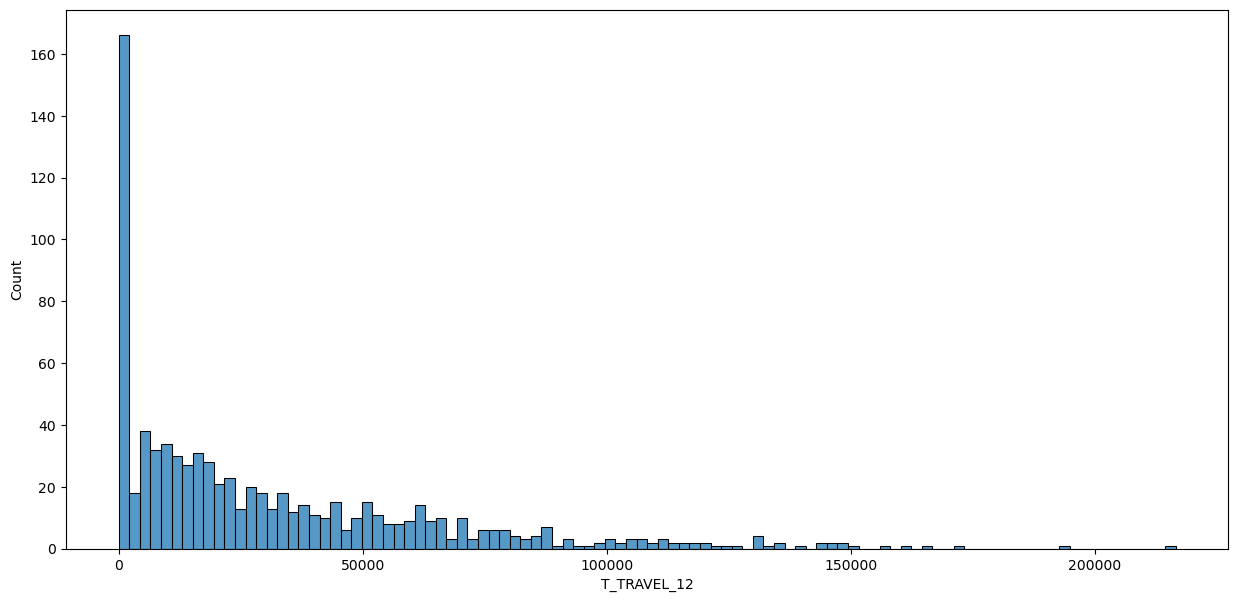

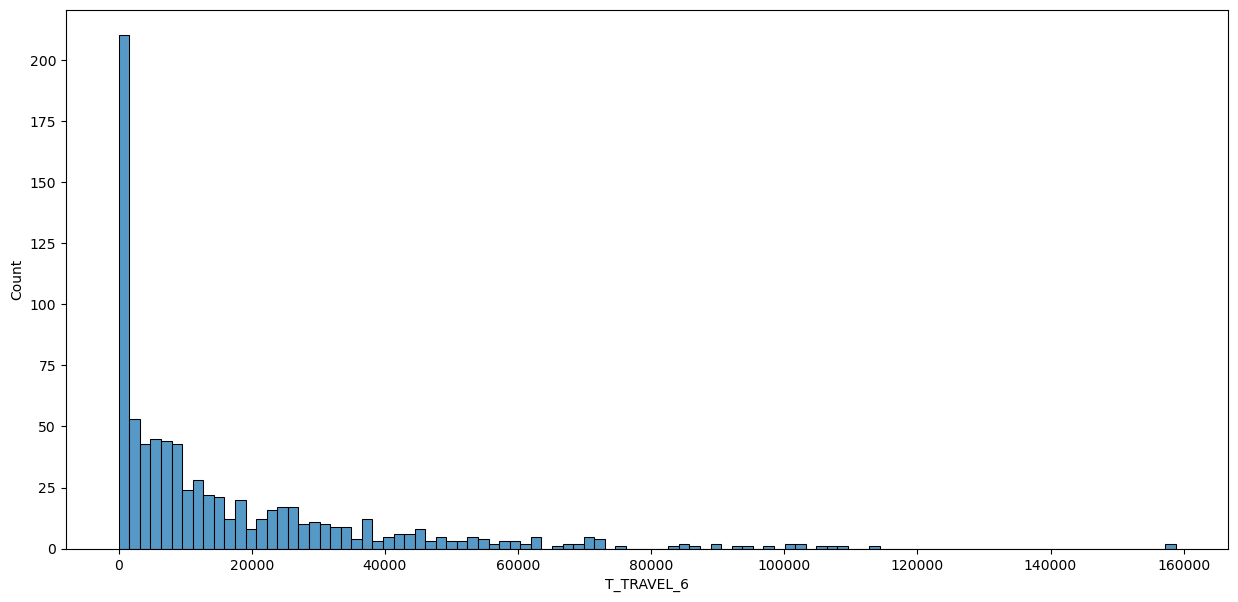

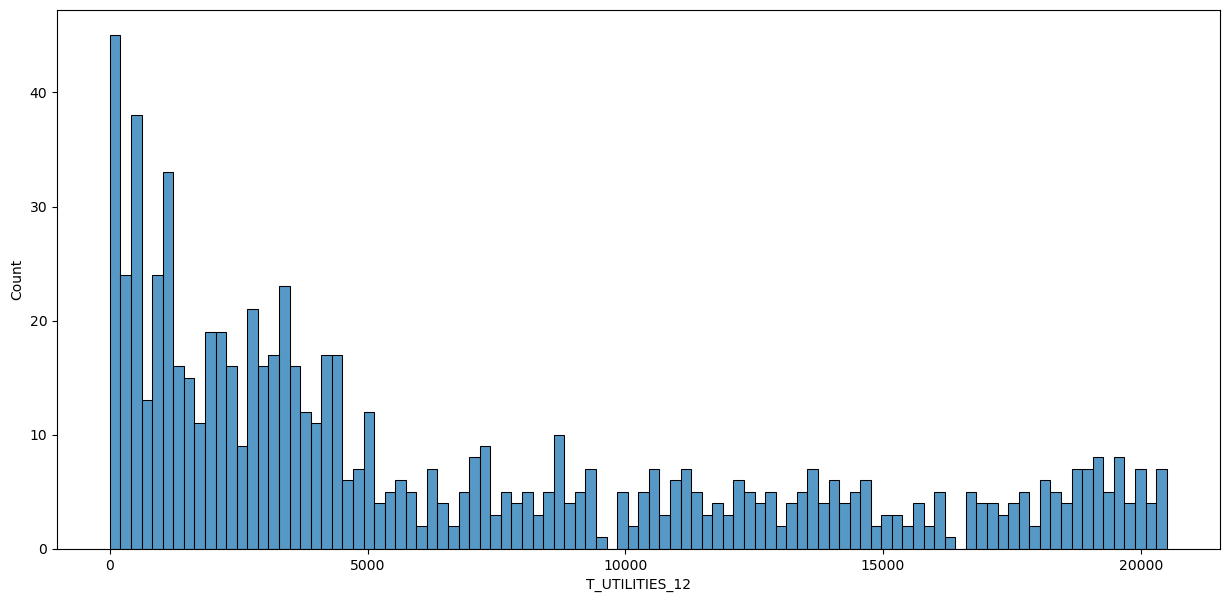

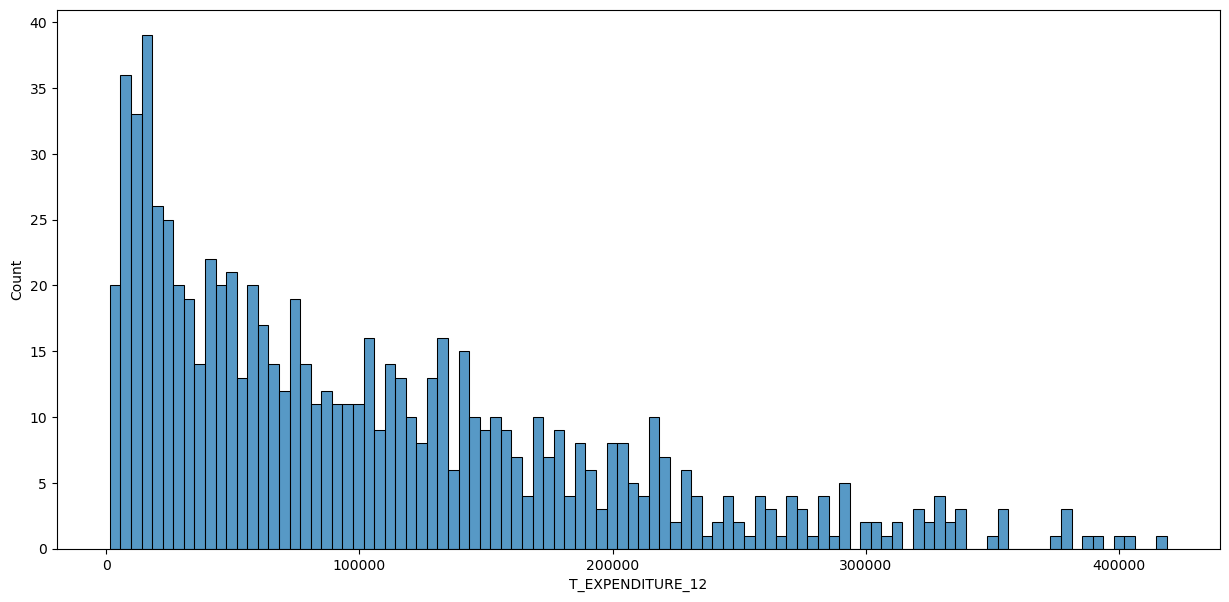

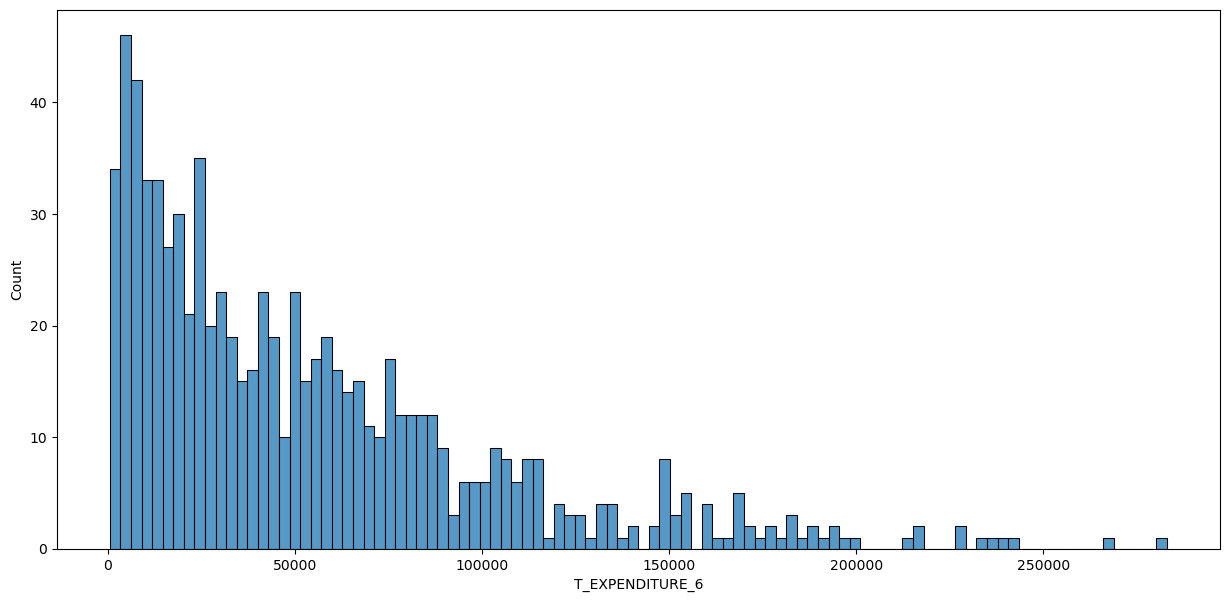

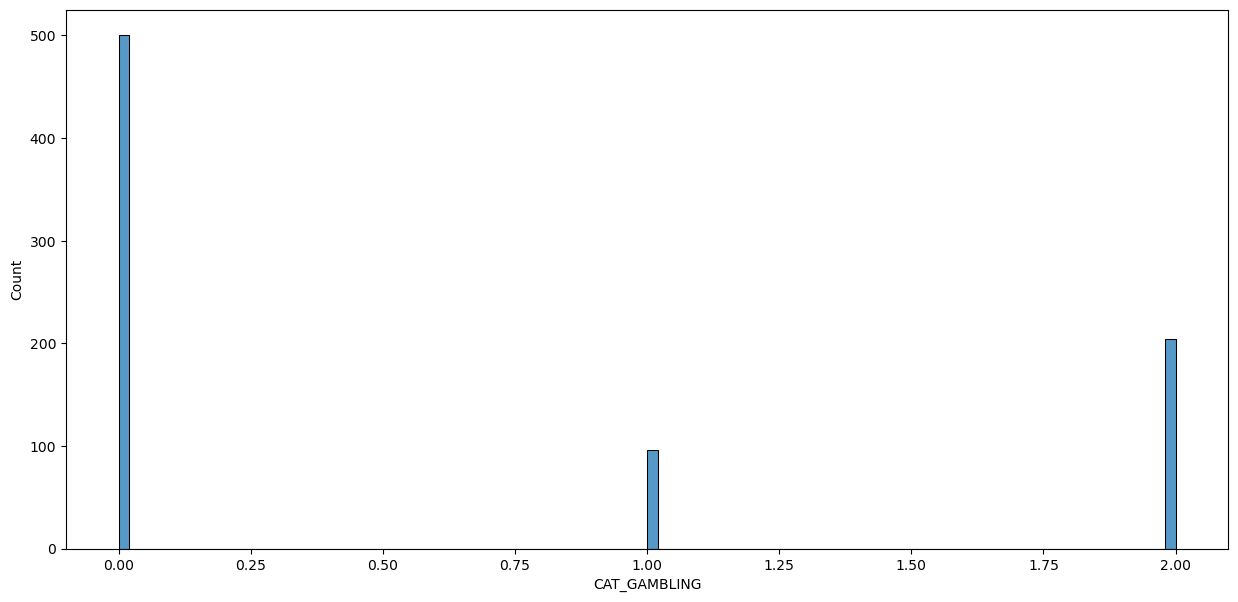

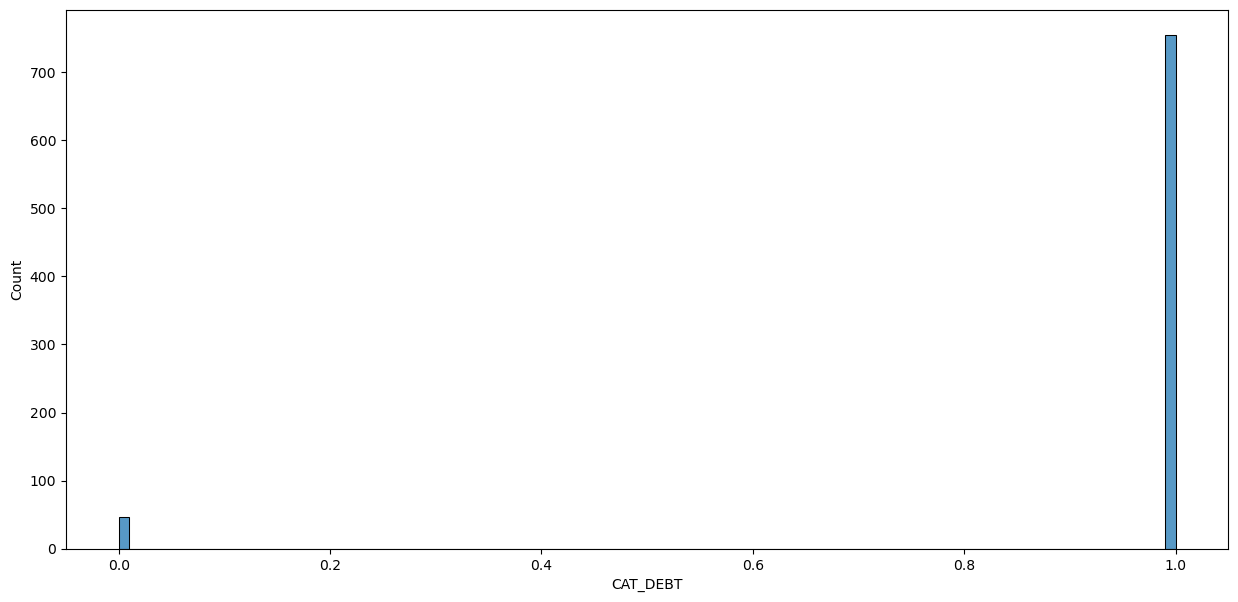

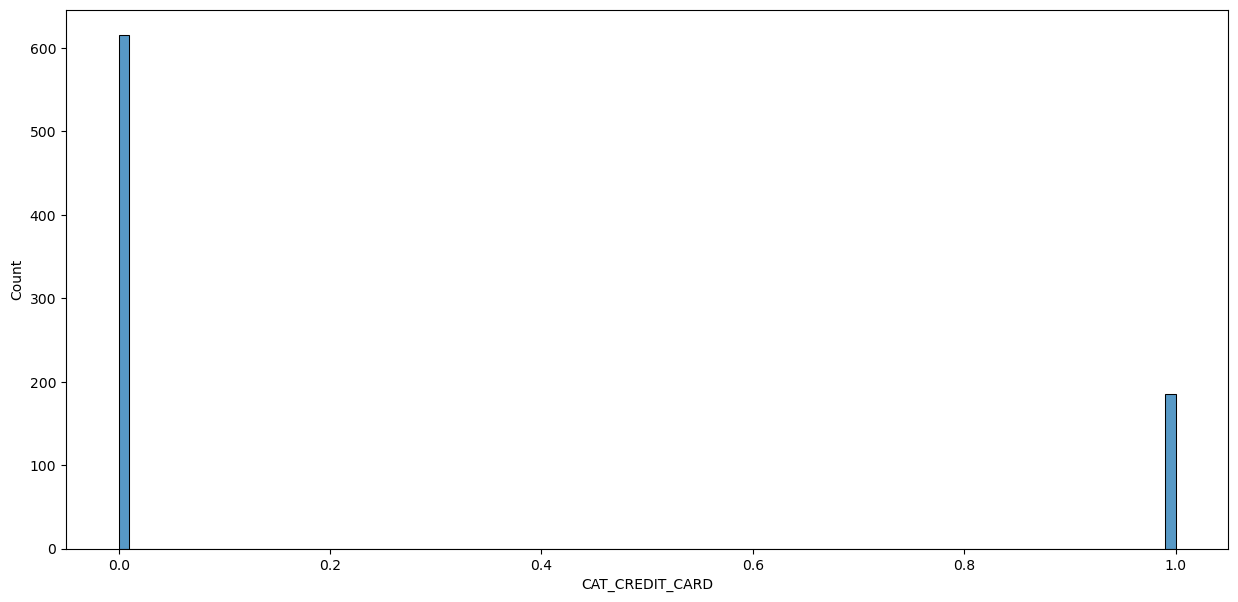

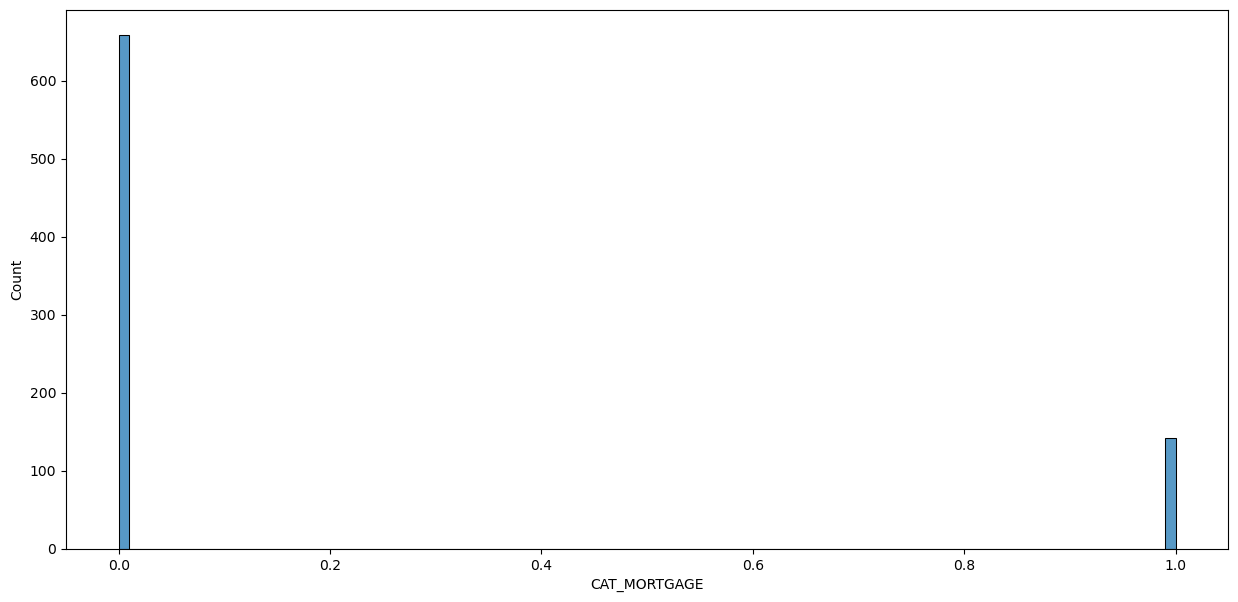

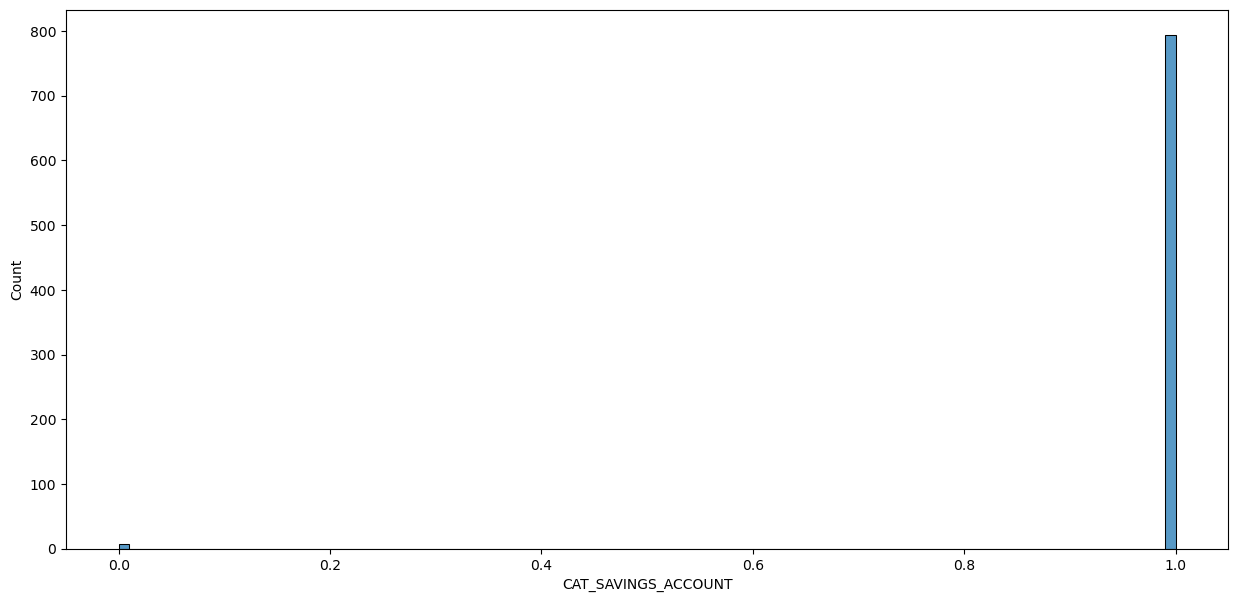

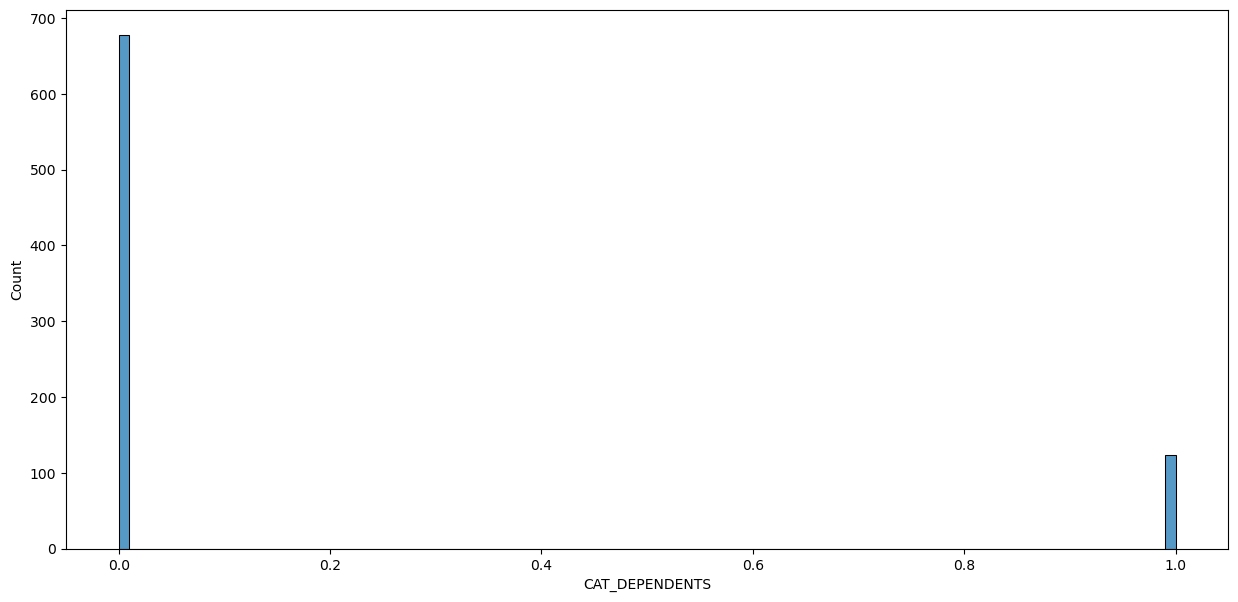

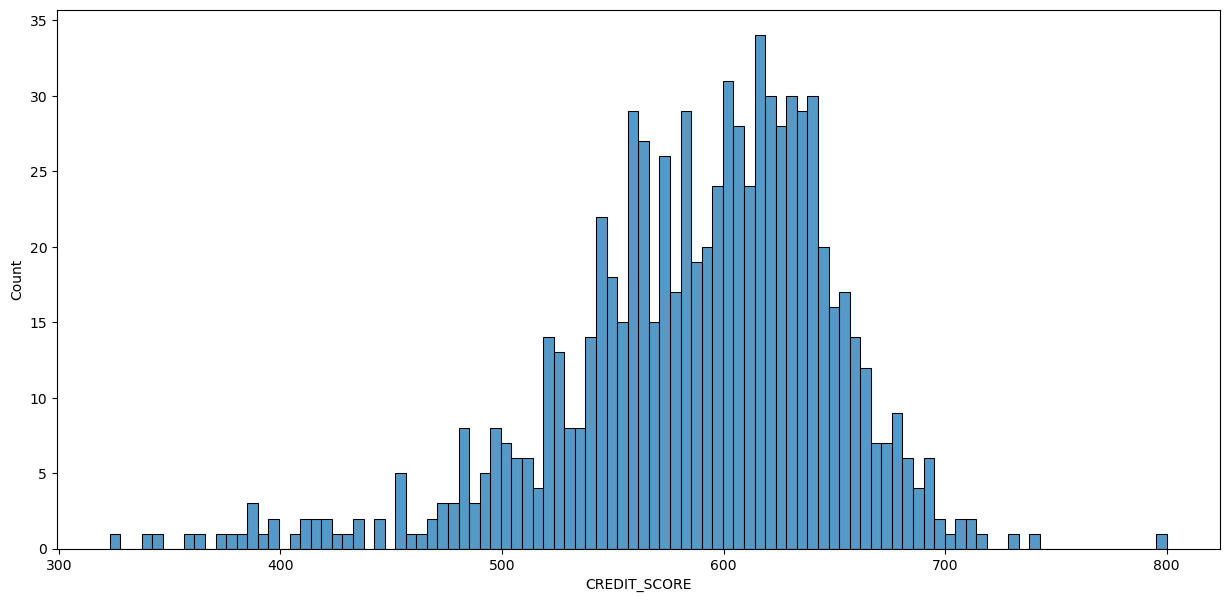

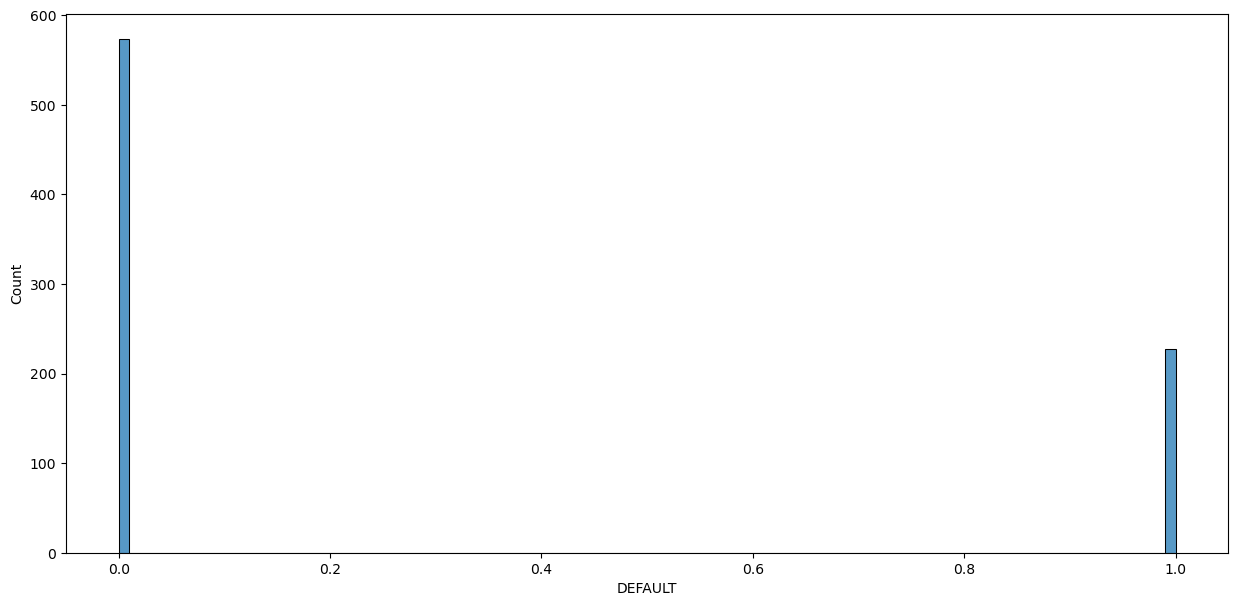

In [143]:
for column in data.columns:
    plt.figure(figsize=(15, 7)) 
    sns.histplot(data[column], bins=100)


<AxesSubplot: xlabel='SAVINGS_sqrt', ylabel='Count'>

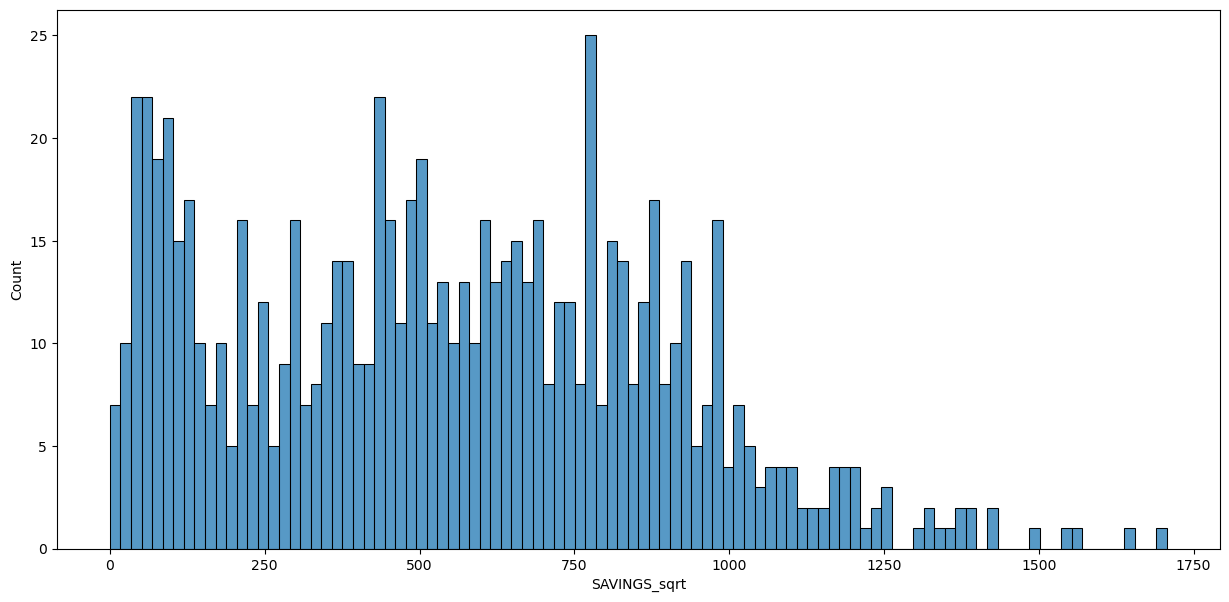

In [144]:
data['SAVINGS_sqrt']=np.sqrt(data['SAVINGS'])

plt.figure(figsize=(15, 7))  
sns.histplot(data['SAVINGS_sqrt'], bins=100)

In [145]:
data[data['T_TRAVEL_6']>140000]

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_FINES_6,T_GAMBLING_12,...,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT,SAVINGS_sqrt
75,414920,1357920,2414080,33407,23191,7557,28910,0,0,16109,...,267213,2,1,1,0,1,0,538,0,1165.298245
770,502583,963284,1088929,24957,22274,0,30553,0,0,15137,...,282929,2,1,0,1,1,0,603,1,981.470326


In [146]:
data['T_TRAVEL_6'].sort_values(ascending=False).head(10)

770    158788
75     158046
631    112871
201    108156
41     106815
31     105562
200    102124
477    101899
237    101581
126    100108
Name: T_TRAVEL_6, dtype: int64

<h1>PROBABLY 2 OUTLIERS HERE??? </h1>

In [147]:
data[data['T_HEALTH_6']>20000]

,INCOME,SAVINGS,DEBT,T_CLOTHING_12,T_CLOTHING_6,T_EDUCATION_12,T_ENTERTAINMENT_12,T_FINES_12,T_FINES_6,T_GAMBLING_12,...,T_EXPENDITURE_6,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT,SAVINGS_sqrt
404,314430,445442,707468,35861,29157,0,37425,0,0,18912,...,160030,2,1,0,1,1,0,691,0,667.414414


In [148]:
data['T_HEALTH_6'].sort_values(ascending=False).head(10)

404    25322
75     17927
770    17874
237    17427
728    17312
556    17270
555    16920
158    16103
380    14292
631    13962
Name: T_HEALTH_6, dtype: int64

<h1>AN OUTLIER HERE???</h1>

In [149]:
data['T_FINES_6'].sort_values(ascending=False).head(10)

702    1082
725     998
17      989
362     925
154     791
480     474
257     428
543     427
6       388
665     380
Name: T_FINES_6, dtype: int64

In [150]:
# num_cols = 2 
# num_rows = (87 + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 500))

# axes = axes.flatten()

# for i, column in enumerate(data.columns):
#     sns.boxplot(x='DEFAULT', y=column, data=data, ax=axes[i])
#     axes[i].set_title(column + ' by DEFAULT', fontsize=20)
#     axes[i].set_xlabel('DEFAULT', fontsize=18)
#     axes[i].set_ylabel(column, fontsize=18)
#     axes[i].tick_params(axis='x', labelsize=18)
#     axes[i].tick_params(axis='y', labelsize=18)


# for j in range(i+1, num_rows*num_cols):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()

<h3>OUTLIERS</h3>

In [151]:
#find records, where DEFAULT=1 and CAT_dependents=0
# make heatmap of dependents and default

print(data[(data['DEFAULT'] == 1) & (data['CAT_DEPENDENTS'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_DEPENDENTS'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEPENDENTS'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEPENDENTS'] == 0)].shape)

#no outliers


(44, 29)
(183, 29)
(79, 29)
(494, 29)


In [152]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_MORTGAGE'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_MORTGAGE'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_MORTGAGE'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_MORTGAGE'] == 0)].shape)
#no outliers

(48, 29)
(179, 29)
(94, 29)
(479, 29)


In [153]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_SAVINGS_ACCOUNT'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_SAVINGS_ACCOUNT'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_SAVINGS_ACCOUNT'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_SAVINGS_ACCOUNT'] == 0)].shape)

(224, 29)
(3, 29)
(569, 29)
(4, 29)


<h1>PROBABLY 7 OUTLIERS HERE??? </h1>

In [154]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_DEBT'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_DEBT'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEBT'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_DEBT'] == 0)].shape)

(221, 29)
(6, 29)
(533, 29)
(40, 29)


In [155]:
print(data[(data['DEFAULT'] == 1) & (data['CAT_CREDIT_CARD'] == 1)].shape)
print(data[(data['DEFAULT'] == 1) & (data['CAT_CREDIT_CARD'] == 0)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_CREDIT_CARD'] == 1)].shape)
print(data[(data['DEFAULT'] == 0) & (data['CAT_CREDIT_CARD'] == 0)].shape)
#no outliers

(75, 29)
(152, 29)
(110, 29)
(463, 29)


In [160]:
for column in data.columns:
    print(column, data[data[column]==0].shape[0])

INCOME 41
SAVINGS 7
DEBT 46
T_CLOTHING_12 41
T_CLOTHING_6 54
T_EDUCATION_12 482
T_ENTERTAINMENT_12 41
T_FINES_12 745
T_FINES_6 764
T_GAMBLING_12 500
T_GROCERIES_12 0
T_HEALTH_12 42
T_HEALTH_6 59
T_HOUSING_12 421
T_TAX_12 155
T_TRAVEL_12 164
T_TRAVEL_6 164
T_UTILITIES_12 42
T_EXPENDITURE_12 0
T_EXPENDITURE_6 0
CAT_GAMBLING 500
CAT_DEBT 46
CAT_CREDIT_CARD 615
CAT_MORTGAGE 658
CAT_SAVINGS_ACCOUNT 7
CAT_DEPENDENTS 677
CREDIT_SCORE 0
DEFAULT 573
SAVINGS_sqrt 7


In [165]:
data[(data['DEBT'] != 1)]['DEFAULT'].mean()

0.28375